In [1]:
import pandas as pd
import json

In [2]:
with open("../data/outputs/language_lookup.json") as json_file:
    language_lookup = json.load(json_file)

In [3]:
rename_lang = {'nld':'du', 'ekk': 'ee', 'eng':'en', 'fin': 'fi', 'deu': 'ge', 'ell':'gr', 'heb':'he',
 'ita':'it', 'nor':'no', 'rus':'ru', 'spa':'sp', 'tur':'tr'}

In [4]:
df_cosine_sim = pd.read_csv(r"../data/outputs/linguistic_similarities.csv").rename(columns = rename_lang)
df_cosine_sim["lang"] = df_cosine_sim['Unnamed: 0'].replace(rename_lang).values

In [5]:
df_cosine_sim

,Unnamed: 0,du,en,ee,fi,ge,gr,he,it,no,ru,sp,tr,lang
0,nld,1.000000,0.837914,0.778454,0.682242,0.915209,0.735120,0.663798,0.779484,0.870930,0.814277,0.736906,0.461880,du
1,eng,0.837914,1.000000,0.774955,0.677118,0.821643,0.732275,0.647440,0.750585,0.855193,0.783389,0.733594,0.424274,en
2,ekk,0.778454,0.774955,1.000000,0.844653,0.790599,0.766416,0.692057,0.758490,0.865444,0.848943,0.740839,0.526688,ee
3,fin,0.682242,0.677118,0.844653,1.000000,0.696868,0.716085,0.654206,0.664746,0.768843,0.809174,0.673324,0.569298,fi
4,deu,0.915209,0.821643,0.790599,0.696868,1.000000,0.745701,0.663189,0.764347,0.880705,0.825531,0.722596,0.481218,ge
5,ell,0.735120,0.732275,0.766416,0.716085,0.745701,1.000000,0.702431,0.802714,0.776151,0.813399,0.800563,0.507660,gr
6,heb,0.663798,0.647440,0.692057,0.654206,0.663189,0.702431,1.000000,0.707791,0.703051,0.713024,0.692203,0.433861,he
7,ita,0.779484,0.750585,0.758490,0.664746,0.764347,0.802714,0.707791,1.000000,0.769039,0.793395,0.897510,0.478162,it
8,nor,0.870930,0.855193,0.865444,0.768843,0.880705,0.776151,0.703051,0.769039,1.000000,0.859240,0.752101,0.486136,no
9,rus,0.814277,0.783389,0.848943,0.809174,0.825531,0.813399,0.713024,0.793395,0.859240,1.000000,0.776391,0.507972,ru


In [6]:
# lang_values = []
# lang_pairs = []
# for key1 in language_lookup.keys():
#     for key2 in language_lookup.keys():
#         #print((key1, key2))
#         val1 = float(df_cosine_sim[df_cosine_sim['lang'] == key1][key2])
#         #cosine_sim[f'{key1}_{key2}'] =  val1
#         lang_values.append(val1)
#         lang_pairs.append(f'{key1}_{key2}')  
 

In [7]:
lang_values = []
lang_pairs = []
for key1 in language_lookup.keys():
    for key2 in language_lookup.keys():
        if (f'{key1}_{key2}' not in lang_pairs) and (f'{key2}_{key1}' not in lang_pairs):
            val1 = float(df_cosine_sim[df_cosine_sim['lang'] == key1][key2])
            lang_values.append(val1)
            lang_pairs.append(f'{key1}_{key2}')  

In [8]:
df_cosine_similarity = pd.DataFrame({'pair': lang_pairs, 'cosine_val': lang_values})

In [9]:
# with open("../data/outputs/cosine_similarity.json", "w") as outfile:
#     json.dump(cosine_sim, outfile)

In [10]:
df_logreg_similarity = pd.read_csv("../data/outputs/logreg_similarity_SC_IC_uni.csv")

In [11]:
df_logreg_similarity


,pair,logreg_val,logreg_val_inverted
0,ee_ee,4.381449e-01,0.561855
1,ee_en,1.329589e-03,0.998670
2,ee_fi,8.640455e-02,0.913595
3,ee_ge,8.805097e-02,0.911949
4,ee_he,6.678665e-04,0.999332
5,ee_it,1.026051e-01,0.897395
6,ee_sp,6.822027e-02,0.931780
7,en_ee,1.329589e-03,0.998670
8,en_en,7.602330e-01,0.239767
9,en_fi,6.721397e-02,0.932786


In [12]:
df_similarities = df_cosine_similarity.merge(df_logreg_similarity, on = 'pair', how = 'left')

In [13]:
df_similarities_ = df_similarities.dropna().reset_index()

In [14]:
import matplotlib.pyplot as plt

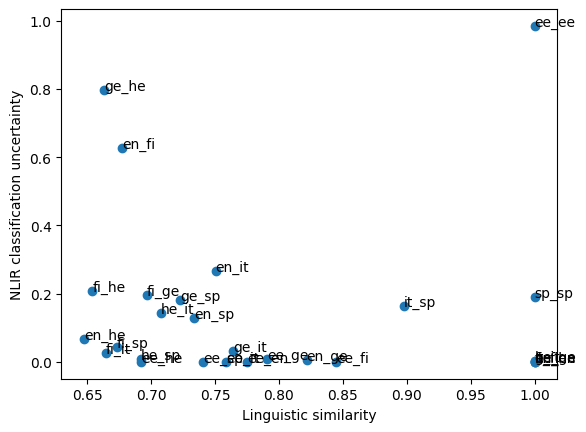

In [47]:
# WFC
zz = df_similarities_['cosine_val']
yy = df_similarities_['logreg_val']

fig, ax = plt.subplots()
ax.scatter(zz, yy)
ax.set_ylabel('NLIR classification uncertainty')
ax.set_xlabel('Linguistic similarity')
# ax.set_ylim(-0.1, 0.1)
# ax.set_xlim(0.6, 0.85)

for i, txt in enumerate(df_similarities_['pair']):
    #print(i, txt)
    ax.annotate(txt, (zz[i], yy[i]))

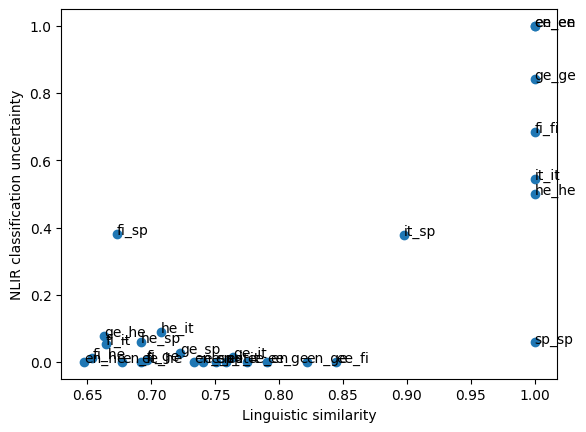

In [36]:
# SC IC
zz = df_similarities_['cosine_val']
yy = df_similarities_['logreg_val']

fig, ax = plt.subplots()
ax.scatter(zz, yy)
ax.set_ylabel('NLIR classification uncertainty')
ax.set_xlabel('Linguistic similarity')
# ax.set_ylim(-0.1, 0.1)
# ax.set_xlim(0.6, 0.85)

for i, txt in enumerate(df_similarities_['pair']):
    #print(i, txt)
    ax.annotate(txt, (zz[i], yy[i]))

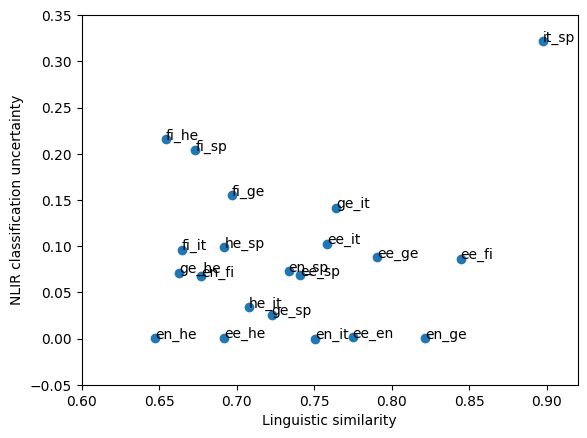

In [25]:
# SC IC uni
zz = df_similarities_['cosine_val']
yy = df_similarities_['logreg_val']

fig, ax = plt.subplots()
ax.scatter(zz, yy)
ax.set_ylabel('NLIR classification uncertainty')
ax.set_xlabel('Linguistic similarity')
ax.set_ylim(-0.05, 0.35)
ax.set_xlim(0.6, 0.92)

for i, txt in enumerate(df_similarities_['pair']):
    #print(i, txt)
    ax.annotate(txt, (zz[i], yy[i]))

In [16]:
from scipy.cluster.hierarchy import ward, dendrogram

In [17]:
ling_matrix = pd.read_csv("../data/outputs/linguistic_similarities.csv", index_col=0).rename(columns = rename_lang, index=rename_lang)
ling_matrix = ling_matrix.loc[["ee", "en", "fi", "ge", "he", "it", "sp"]]
ling_matrix = ling_matrix[["ee", "en", "fi", "ge", "he", "it", "sp"]]


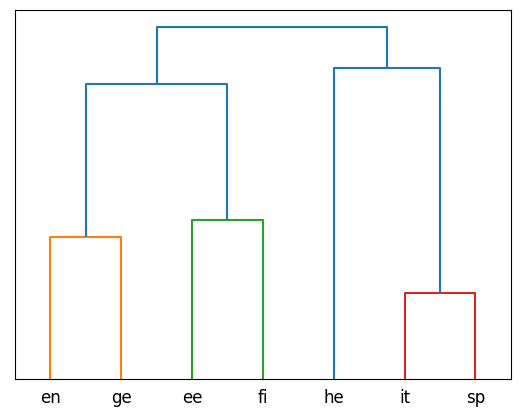

<Figure size 640x480 with 0 Axes>

In [18]:
# language tree
tree = ward(ling_matrix)
fig, ax = plt.subplots()
dn = dendrogram(tree, ax=ax, labels=ling_matrix.index)
ax.set_yticks([])
plt.show()
plt.savefig("../data/outputs/linguistic-tree.png")

In [20]:
acc_matrix = pd.read_csv(r"../data/outputs/logreg_similarity_SC_IC_uni.csv")[["pair", "logreg_val_inverted"]]
acc_matrix["lang1"] = acc_matrix.apply(lambda x: x["pair"][:2], axis=1)
acc_matrix["lang2"] = acc_matrix.apply(lambda x: x["pair"][-2:], axis=1)
acc_matrix = acc_matrix.pivot(index="lang1", columns="lang2", values="logreg_val_inverted")

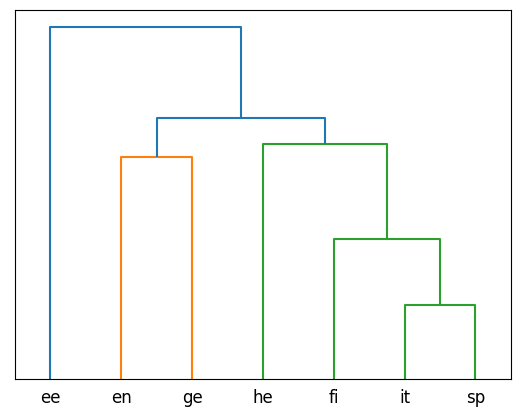

<Figure size 640x480 with 0 Axes>

In [19]:
# WFC
tree = ward(acc_matrix)
fig, ax = plt.subplots()
dendrogram(tree, ax=ax, labels=acc_matrix.index)
ax.set_yticks([])
plt.show()
plt.savefig("../data/outputs/uncertainty-tree.png")

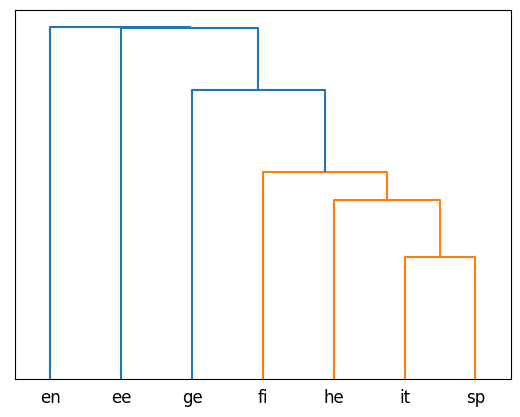

In [42]:
# SC IC
tree = ward(acc_matrix)
fig, ax = plt.subplots()
dendrogram(tree, ax=ax, labels=acc_matrix.index)
ax.set_yticks([])
plt.show()
#plt.savefig("../data/outputs/uncertainty-tree.png")

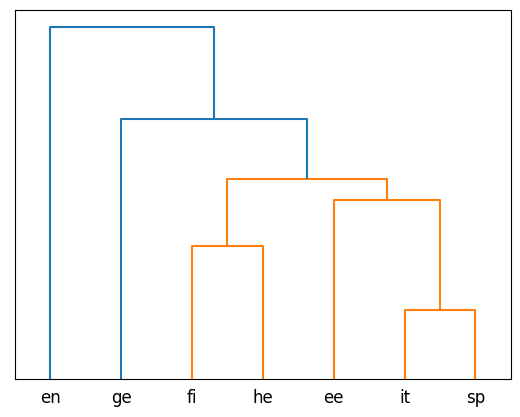

In [21]:
# SC IC uni
tree = ward(acc_matrix)
fig, ax = plt.subplots()
dendrogram(tree, ax=ax, labels=acc_matrix.index)
ax.set_yticks([])
plt.show()
#plt.savefig("../data/outputs/uncertainty-tree.png")